# Movielens Case Study

DESCRIPTION

Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

## Importing the Pandas, NumPy, Seaborn and Matplot Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mtplt
%matplotlib inline

## Importing the data which includes Movies

In [3]:
f=open(r'C:\Users\Adarsh Singh\Documents\Data Science\Data Science with Python\Data science with Python 1\movies.dat',encoding='cp1252')

In [4]:
f

<_io.TextIOWrapper name='C:\\Users\\Adarsh Singh\\Documents\\Data Science\\Data Science with Python\\Data science with Python 1\\movies.dat' mode='r' encoding='cp1252'>

In [5]:
movielist = []
for line in f:
    s = line.strip().split('::')
    movielist.append(s)

df_movie=pd.DataFrame(movielist,columns=['MovieID','Title','Genres'])
f.close()

In [6]:
df_movie.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## Importing the data which includes Ratings of Movies

In [7]:
g=open(r'C:\Users\Adarsh Singh\Documents\Data Science\Data Science with Python\Data science with Python 1\ratings.dat',encoding='cp1252')

In [8]:
ratinglist = []
for line in g:
    s = line.strip().split('::')
    ratinglist.append(s)

df_rating = pd.DataFrame(ratinglist,columns=['UserID','MovieID','Rating','Timestamp'])
g.close()

In [9]:
df_rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## Importing the data which includes Users

In [10]:
h=open(r'C:\Users\Adarsh Singh\Documents\Data Science\Data Science with Python\Data science with Python 1\users.dat',encoding='cp1252')

In [11]:
userlist = []
for line in h:
    s = line.strip().split('::')
    userlist.append(s)

df_user = pd.DataFrame(userlist,columns=['UserID','Gender','Age','Occupation','Zip-code'])
h.close()

In [12]:
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Merging the Rating and User dataframe using User Id

In [13]:
data1 = pd.merge(df_rating,df_user,on='UserID')

In [14]:
data1.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [15]:
Master = pd.merge(df_movie,data1,on='MovieID')

## Merging the Movies data frame with above merged data frame as Master_DataFrame

In [16]:
Master_Data = pd.merge(df_movie,data1,on='MovieID')

In [17]:
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


## Dropping the TimeStamp and Zip-code columns from Master DataFrame

In [18]:
Master_Data.drop(['Timestamp','Zip-code'],axis = 1,inplace=True)

In [19]:
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,M,25,12
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,M,25,17
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,F,35,1


In [20]:
Master_Data.drop(['Genres'],axis = 1,inplace=True)

In [21]:
Master_Data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,1,Toy Story (1995),6,4,F,50,9
2,1,Toy Story (1995),8,4,M,25,12
3,1,Toy Story (1995),9,5,M,25,17
4,1,Toy Story (1995),10,5,F,35,1


In [22]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  object
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  object
 3   Rating      1000209 non-null  object
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  object
 6   Occupation  1000209 non-null  object
dtypes: object(7)
memory usage: 61.0+ MB


In [23]:
Master_Data.describe()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
count,1000209,1000209,1000209,1000209,1000209,1000209,1000209
unique,3706,3706,6040,5,2,7,21
top,2858,American Beauty (1999),4169,4,M,25,4
freq,3428,3428,2314,348971,753769,395556,131032


In [24]:
Master_Data['Age'].unique()

array(['1', '50', '25', '35', '18', '45', '56'], dtype=object)

## Below Bar Graph for User's Age Distribution

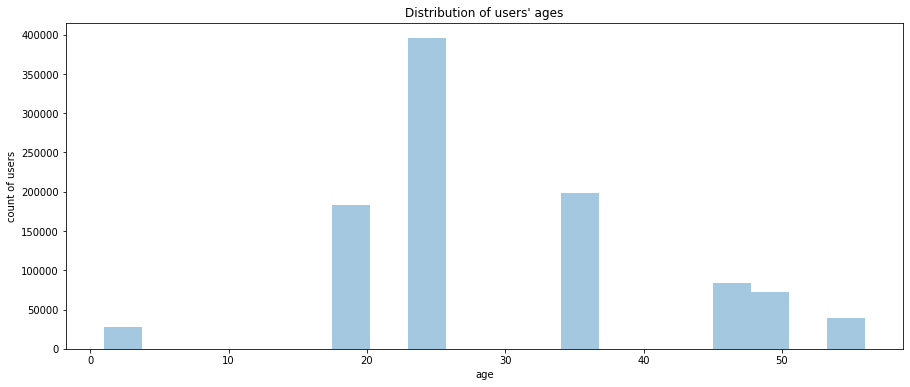

In [25]:
# User Age Distribution
mtplt.figure(figsize=(15,6))
sns.distplot(Master_Data['Age'],kde=False,bins=20)
mtplt.title("Distribution of users' ages")
mtplt.ylabel('count of users')
mtplt.xlabel('age');

### As per the above Distribution, Age Group between 25-34 is highest movie watching group
### And after that age group between 35-44 and 18-24 are highest movie watching group

In [26]:
Master_Data['Title'].str.contains('Toy Story')

0           True
1           True
2           True
3           True
4           True
           ...  
1000204    False
1000205    False
1000206    False
1000207    False
1000208    False
Name: Title, Length: 1000209, dtype: bool

## User rating of "Toy Story" movie 

In [27]:
Toy_Story_Rating = Master_Data[Master_Data['Title'].str.match(r'(^Toy Story.*\(1995\)$)')==True].loc[:,['Title','UserID','Gender','Age','Rating']]

In [28]:
Toy_Story_Rating

,Title,UserID,Gender,Age,Rating
0,Toy Story (1995),1,F,1,5
1,Toy Story (1995),6,F,50,4
2,Toy Story (1995),8,M,25,4
3,Toy Story (1995),9,M,25,5
4,Toy Story (1995),10,F,35,5
...,...,...,...,...,...
2072,Toy Story (1995),6022,M,25,5
2073,Toy Story (1995),6025,F,25,5
2074,Toy Story (1995),6032,M,45,4
2075,Toy Story (1995),6035,F,25,4


## Distribution of Rating for Toy Story

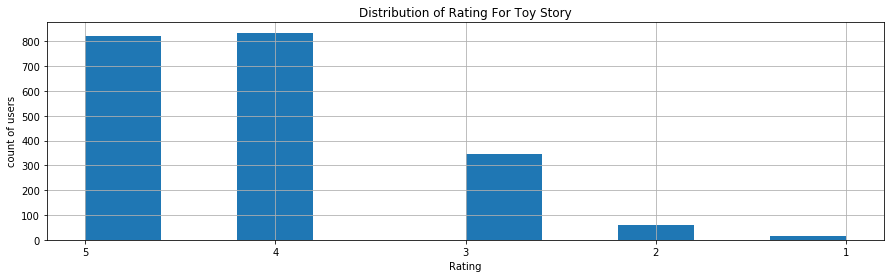

In [29]:
mtplt.figure(figsize=(15,4))
Toy_Story_Rating['Rating'].hist()
mtplt.title("Distribution of Rating For Toy Story")
mtplt.ylabel('count of users')
mtplt.xlabel('Rating');

### As per the above graph the maximu rating for Toy Story is 4 and 5 is the Second highest number of rating provided by user.

In [30]:
Toy_Story = Toy_Story_Rating.loc[:,['Age','Rating']]


In [31]:
Toy_Story['Age'] = pd.to_numeric(Toy_Story['Age'])
Toy_Story['Rating'] = pd.to_numeric(Toy_Story['Rating'])

In [32]:
Toy_Story.groupby('Age').agg({'Rating' : [np.size,np.mean]})

Rating          
      size      mean
Age                 
1      112  3.919643
18     448  4.017857
25     790  4.201266
35     423  4.302600
45     143  4.104895
50     108  4.092593
56      53  3.886792

### As per the above table Age group 35-44 has rated this movie very high

## Bar Graph for Ratings of "Toy Story" according to different Age Group

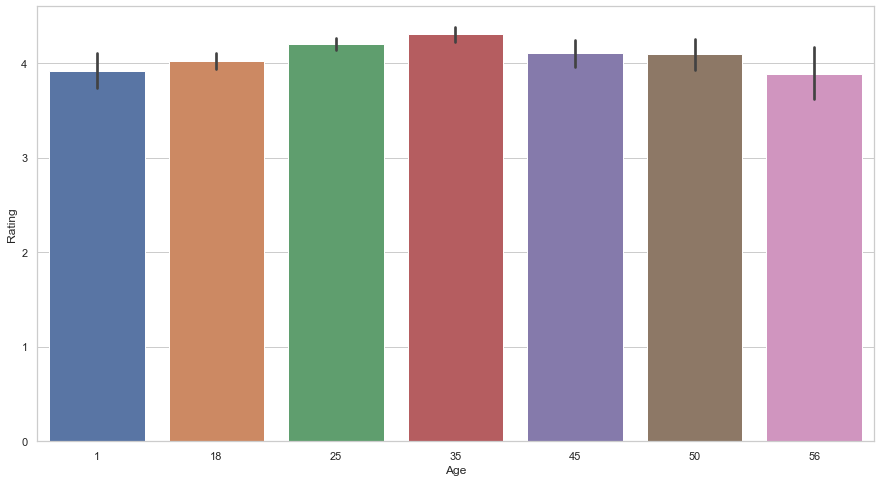

In [33]:
mtplt.figure(figsize=(15,8))
sns.set(style="whitegrid")
ax = sns.barplot(x = 'Age', y = 'Rating', data=Toy_Story)

## Top 25 movies by viewership rating

In [43]:
Master_Data['Rating'] = pd.to_numeric(Master_Data['Rating'])

In [44]:
Top_25 = pd.DataFrame(Master_Data.groupby('Title')['Rating'].mean(),columns = ['Rating'])

In [45]:
Top_25.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [46]:
Top_25.sort_values(by=['Rating'],inplace=True,ascending=False)

In [47]:
Top_25.head(25)

,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


## The ratings for all the movies reviewed by for a particular user of user id = 2696

In [48]:
Master_Data[Master_Data['UserID'] == '2696']

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
95261,350,"Client, The (1994)",2696,3,M,25,7
200536,800,Lone Star (1996),2696,5,M,25,7
270342,1092,Basic Instinct (1992),2696,4,M,25,7
274576,1097,E.T. the Extra-Terrestrial (1982),2696,3,M,25,7
349333,1258,"Shining, The (1980)",2696,4,M,25,7
360382,1270,Back to the Future (1985),2696,2,M,25,7
448293,1589,Cop Land (1997),2696,3,M,25,7
457193,1617,L.A. Confidential (1997),2696,4,M,25,7
459835,1625,"Game, The (1997)",2696,4,M,25,7
464473,1644,I Know What You Did Last Summer (1997),2696,2,M,25,7


In [49]:
Master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [50]:
Master.drop(['Timestamp','Zip-code'],axis = 1,inplace=True)

In [51]:
Master.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,M,25,12
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,M,25,17
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,F,35,1


In [52]:
Master['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [53]:
def genres(x):
    genList = []
    m = x.strip().split('|')
    genList.append(m)
    return genList

In [54]:
GenList = Master['Genres'].apply(genres)

In [55]:
GenList

0          [[Animation, Children's, Comedy]]
1          [[Animation, Children's, Comedy]]
2          [[Animation, Children's, Comedy]]
3          [[Animation, Children's, Comedy]]
4          [[Animation, Children's, Comedy]]
                         ...                
1000204                  [[Drama, Thriller]]
1000205                  [[Drama, Thriller]]
1000206                  [[Drama, Thriller]]
1000207                  [[Drama, Thriller]]
1000208                  [[Drama, Thriller]]
Name: Genres, Length: 1000209, dtype: object

In [56]:
gen = [k for i in GenList for j in i for k in j]

In [57]:
gen

['Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',
 'Animation',
 "Children's",
 'Comedy',


In [58]:
Gen = []
for i in gen:
    if i not in Gen:
        Gen.append(i)

In [59]:
Gen

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical',
 'Mystery',
 'Film-Noir',
 'Western']

### As per the above unique value there are total 18 uqniue genres.

## Function for developing the list for each unique movie genre

In [61]:

import re
def Animation(x):
    Animation = []
    
    search_string = x
    pattern = 'Animation'
    match = re.search(pattern, search_string)
    
    if match:
        Animation.append(1)
    else:
        Animation.append(0)
        
    return Animation

def Children(x):
    
    Childrens = []
    
    search_string = x
    pattern1 = 'Children'
    match1 = re.search(pattern1, search_string)
        
    if match1:
        Childrens.append(1)
    else:
        Childrens.append(0)
        
    return Childrens
    
def Comedy(x):
    
    Comedy = []
    
    search_string = x
    pattern2 = 'Comedy'
    match2 = re.search(pattern2, search_string)
        
    if match2:
        Comedy.append(1)
    else:
        Comedy.append(0)
        
    return Comedy
    
def Adventure(x):
    
    Adventure = []
    
    search_string = x
    pattern3 = 'Adventure'
    match3 = re.search(pattern3, search_string)  
        
    if match3:
        Adventure.append(1)
    else:
        Adventure.append(0)
        
    return Adventure
    
def Fantasy(x):
    
    Fantasy = []
    
    search_string = x
    pattern4 = 'Fantasy'
    match4 = re.search(pattern4, search_string)  
        
    if match4:
        Fantasy.append(1)
    else:
        Fantasy.append(0)
        
    return Fantasy
    
def Romance(x):
    
    Romance = []
    
    search_string = x
    pattern5 = 'Romance'
    match5 = re.search(pattern5, search_string)  
        
    if match5:
        Romance.append(1)
    else:
        Romance.append(0)
        
    return Romance
    
def Drama(x):
    
    Drama = []
    
    search_string = x
    pattern6 = 'Drama'
    match6 = re.search(pattern6, search_string) 
        
    if match6:
        Drama.append(1)
    else:
        Drama.append(0)
        
    return Drama

def Action(x):
    
    Action =[]
    
    search_string = x
    pattern7 = 'Action'
    match7 = re.search(pattern7, search_string) 
        
    if match7:
        Action.append(1)
    else:
        Action.append(0)
        
    return Action
    
def Crime(x):
    
    Crime = []
    
    search_string = x
    pattern8 = 'Crime'
    match8 = re.search(pattern8, search_string) 
        
    if match8:
        Crime.append(1)
    else:
        Crime.append(0)
        
    return Crime

def Thriller(x):
    
    Thriller = []
    
    search_string = x
    pattern9 = 'Thriller'
    match9 = re.search(pattern9, search_string)
        
    if match9:
        Thriller.append(1)
    else:
        Thriller.append(0)
        
    return Thriller
    
def Horror(x):
    
    Horror = []
    
    search_string = x
    pattern10 = 'Horror'
    match10 = re.search(pattern10, search_string)
        
    if match10:
        Horror.append(1)
    else:
        Horror.append(0)
        
    return Horror

def SciFi(x):
    
    SciFi = []
    
    search_string = x
    pattern11 = 'Sci'
    match11 = re.search(pattern11, search_string)
        
    if match11:
        SciFi.append(1)
    else:
        SciFi.append(0)
        
    return SciFi
    
def Documentary(x):
    
    Documentary = []
    
    search_string = x
    pattern12 = 'Documentary'
    match12 = re.search(pattern12, search_string)
        
    if match12:
        Documentary.append(1)
    else:
        Documentary.append(0)
        
    return Documentary

def War(x):
    
    War = []
    
    search_string = x
    pattern13 = 'War'
    match13 = re.search(pattern13, search_string)
        
    if match13:
        War.append(1)
    else:
        War.append(0)
        
    return War
       
def Musical(x):
    
    Musical = []
    
    search_string = x
    pattern14 = 'Musical'
    match14 = re.search(pattern14, search_string)
        
    if match14:
        Musical.append(1)
    else:
        Musical.append(0)        
        
    return Musical   
    
def Mystery(x):
    
    Mystery = []
    
    search_string = x
    pattern15 = 'Mystery'
    match15 = re.search(pattern15, search_string)
        
    if match15:
        Mystery.append(1)
    else:
        Mystery.append(0)
        
    return Mystery 

def FilmNoir(x):
    
    FilmNoir = []
    
    search_string = x
    pattern16 = 'Film'
    match16 = re.search(pattern16, search_string)
        
    if match16:
        FilmNoir.append(1)
    else:
        FilmNoir.append(0)
        
    return FilmNoir

def Western(x):
    
    Western = []
    
    search_string = x
    pattern17 = 'Western'
    match17 = re.search(pattern17, search_string)
        
    if match17:
        Western.append(1)
    else:
        Western.append(0)
        
    return Western  
    


In [62]:
Animation = Master['Genres'].apply(Animation)
Animation1 = [j for i in Animation for j in i]

Childrens = Master['Genres'].apply(Children)
Childrens1 = [j for i in Childrens for j in i]

Comedy = Master['Genres'].apply(Comedy)
Comedy1 = [j for i in Comedy for j in i]

Adventure = Master['Genres'].apply(Adventure)
Adventure1 = [j for i in Adventure for j in i]

Fantasy = Master['Genres'].apply(Fantasy)
Fantasy1 = [j for i in Fantasy for j in i]

Romance = Master['Genres'].apply(Romance)
Romance1 = [j for i in Romance for j in i]

Drama =  Master['Genres'].apply(Drama)
Drama1 = [j for i in Drama for j in i]

Action =  Master['Genres'].apply(Action)
Action1 = [j for i in Action for j in i]

Crime =  Master['Genres'].apply(Crime)
Crime1 = [j for i in Crime for j in i]

Thriller =  Master['Genres'].apply(Thriller)
Thriller1 = [j for i in Thriller for j in i]

Horror =  Master['Genres'].apply(Horror)
Horror1 = [j for i in Horror for j in i]

SciFi =  Master['Genres'].apply(SciFi)
SciFi1 = [j for i in SciFi for j in i]

Documentary =  Master['Genres'].apply(Documentary)
Documentary1 = [j for i in Documentary for j in i]

War = Master['Genres'].apply(War)
War1 = [j for i in War for j in i]

Musical = Master['Genres'].apply(Musical)
Musical1 = [j for i in Musical for j in i]

Mystery = Master['Genres'].apply(Mystery)
Mystery1 = [j for i in Mystery for j in i]

FilmNoir = Master['Genres'].apply(FilmNoir)
FilmNoir1 = [j for i in FilmNoir for j in i]

Western = Master['Genres'].apply(Western) 
Western1 = [j for i in Western for j in i]

In [63]:
Master['Animation'] = Animation1
Master['Childrens'] = Childrens1
Master['Comedy'] = Comedy1
Master['Adventure'] = Adventure1
Master['Fantasy'] = Fantasy1
Master['Romance'] = Romance1
Master['Drama'] = Drama1
Master['Action'] = Action1
Master['Crime'] = Crime1
Master['Thriller'] = Thriller1
Master['Horror'] = Horror1
Master['SciFi'] = SciFi1
Master['Documentary'] = Documentary1
Master['War'] = War1
Master['Musical'] = Musical1
Master['Mystery'] = Mystery1
Master['FilmNoir'] = FilmNoir1
Master['Western'] = Western1

## Hotcod is generated for each movie genres

In [64]:
Master.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation,Animation,Childrens,...,Crime,Thriller,Horror,SciFi,Documentary,War,Musical,Mystery,FilmNoir,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,M,25,12,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,M,25,17,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,F,35,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [65]:
Master['Gender'] = pd.factorize(Master['Gender'])[0]#Female as 0 and Male as 1

In [66]:
Master.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation,Animation,Childrens,...,Crime,Thriller,Horror,SciFi,Documentary,War,Musical,Mystery,FilmNoir,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,0,1,10,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,0,50,9,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,1,25,12,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,1,25,17,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,0,35,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Clear view on the count of each occupation carrying by the users


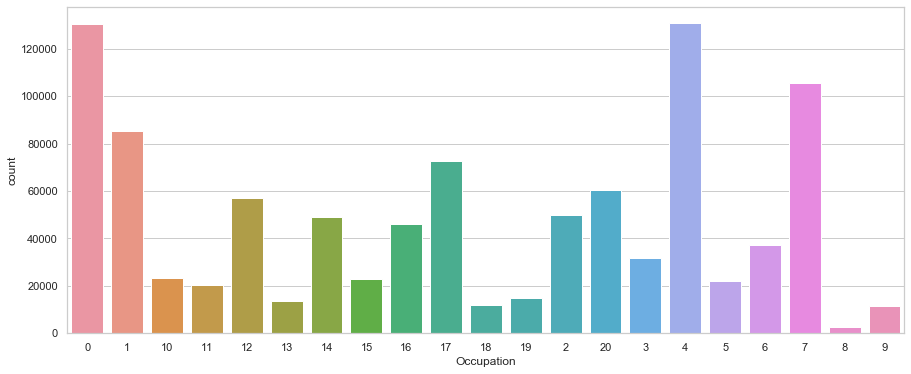

In [67]:
mtplt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='Occupation',data=Master)

### As per the above count plot graph , college student, others and executive category are more in numbers.

In [69]:
Master['Rating'] = pd.to_numeric(Master['Rating'])

In [70]:
Master['Age'] = pd.to_numeric(Master['Age'])

In [71]:
Master['Occupation'] = pd.to_numeric(Master['Occupation'])

## Correlation with heat map

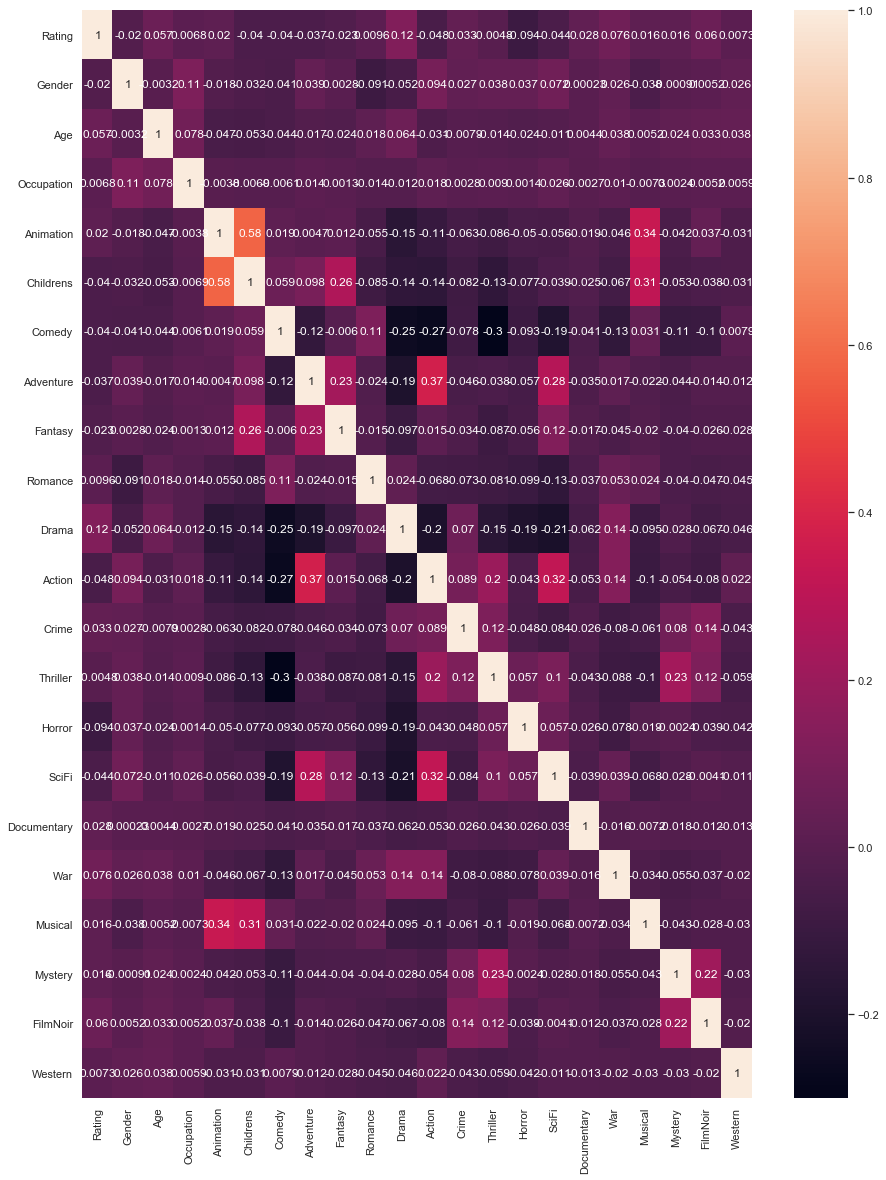

In [72]:

mtplt.figure(figsize=(15,20))
sns.heatmap(Master.corr(),annot=True)

### As per the above correlation plot it is unclear to depict the feature affecting the Rating of movie.

### Feature Selection using Sklearn module

In [75]:
Master.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Gender', 'Age',
       'Occupation', 'Animation', 'Childrens', 'Comedy', 'Adventure',
       'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'SciFi', 'Documentary', 'War', 'Musical', 'Mystery', 'FilmNoir',
       'Western'],
      dtype='object')

In [76]:
x1 = Master.loc[:,['MovieID', 'UserID', 'Gender', 'Age',
       'Occupation', 'Animation', 'Childrens', 'Comedy', 'Adventure',
       'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'SciFi', 'Documentary', 'War', 'Musical', 'Mystery', 'FilmNoir',
       'Western']]

In [77]:
y = Master['Rating']

## USing Sklearn.Feature_Selection for feature selection

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [79]:
new_feature = SelectKBest(score_func=chi2,k='all')

In [80]:
fit = new_feature.fit(x1,y)


In [81]:

new_df = pd.DataFrame(fit.scores_,index=x1.columns,columns=['fit_score'])

In [82]:
new_df

,fit_score
MovieID,3.341344e+06
UserID,1.720993e+05
Gender,1.123188e+02
Age,1.865494e+04
Occupation,6.318728e+02
Animation,4.388623e+02
Childrens,1.596212e+03
Comedy,1.119399e+03
Adventure,1.285005e+03
Fantasy,5.876402e+02


### As per the above table, Gender and Occupation are not affecting the Rating of the movie on comparision with Age and UserId and MovieID are the irrelavant. 

### As all the genres of movie will play the important role in predicting the movie rating, we are considering the all genres.

In [85]:
x = Master.loc[:,['Gender', 'Age',
       'Occupation', 'Animation', 'Childrens', 'Comedy', 'Adventure',
       'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'SciFi', 'Documentary', 'War', 'Musical', 'Mystery', 'FilmNoir',
       'Western']]

## Using Sklearn.model_Selection to get Train and Test data

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

## Decision Tree Model

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
d_tree = DecisionTreeClassifier()

In [90]:
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [91]:
y_pred = d_tree.predict(x_test)

In [92]:
y_pred

array([4, 5, 4, ..., 4, 4, 3], dtype=int64)

In [93]:
from sklearn import metrics
from sklearn.metrics import classification_report

### Classification report based on Decision Tree algorithm

In [94]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy: 0.3495965847172094


              precision    recall  f1-score   support

           1       0.22      0.07      0.11     16895
           2       0.19      0.05      0.08     32304
           3       0.31      0.23      0.26     78236
           4       0.37      0.67      0.48    104913
           5       0.37      0.20      0.26     67715

    accuracy                           0.35    300063
   macro avg       0.29      0.24      0.24    300063
weighted avg       0.33      0.35      0.31    300063



## Random forest Model

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rand_model = RandomForestClassifier(n_estimators = 150)

In [97]:
rand_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
rand_pred = rand_model.predict(x_test)

In [99]:
rand_pred

array([4, 5, 4, ..., 4, 4, 4], dtype=int64)

In [100]:
rand_model.score(x_test,y_test)

0.3521227208952787

### Classification report based on Random Forest algorithm

In [101]:
print("Accuracy:",metrics.accuracy_score(y_test, rand_pred))
print('\n')
print(classification_report(y_test,rand_pred))

Accuracy: 0.3521227208952787


              precision    recall  f1-score   support

           1       0.25      0.06      0.10     16895
           2       0.20      0.04      0.07     32304
           3       0.31      0.22      0.26     78236
           4       0.37      0.68      0.48    104913
           5       0.36      0.22      0.28     67715

    accuracy                           0.35    300063
   macro avg       0.30      0.24      0.23    300063
weighted avg       0.33      0.35      0.31    300063



## Naive Bayes Model

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
gnb = GaussianNB()

In [104]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [105]:
y_pred_gnb = gnb.predict(x_test)

In [106]:
gnb.score(x_test,y_test)

0.28598994211215645

In [107]:
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != y_pred_gnb).sum()))

Number of mislabeled points out of a total 300063 points : 214248


### As per the above Models, Random Forest providing the better accuracy then Decision Tree and Naive Bayes's algorithm.


## Scaling the data using Standard Scaler

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fiting on training set
scaler.fit(x_train)

#Apply transform to both the training set and test set

x_train_1 = scaler.transform(x_train)
x_test_1 = scaler.transform(x_test)

## Applying PCA to reduce the Dimension of DataSet

In [111]:
from sklearn.decomposition import PCA

#Make an instance of the Model

pca_model = PCA(0.95)

pca_model.fit(x_train_1)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [112]:
#Apply mapping to both the training set and test set

X_train = pca_model.transform(x_train_1)
X_test = pca_model.transform(x_test_1)

## Finalised Random Forest Model

In [113]:
#Training the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=150)
model.fit(x_train_1, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
model.score(x_train_1, y_train)

0.41502343796865226

In [115]:
y_pred_df = pd.DataFrame( { "actual": y_test,"predicted": model.predict( x_test_1) } )

In [116]:
y_pred_df

,actual,predicted
94938,4,4
229738,4,5
123244,4,4
254606,1,4
526358,2,4
...,...,...
34936,3,5
830584,4,4
394126,4,4
525738,5,4


In [117]:
print(classification_report( y_pred_df.actual, y_pred_df.predicted ))

              precision    recall  f1-score   support

           1       0.25      0.06      0.10     16895
           2       0.21      0.04      0.07     32304
           3       0.31      0.22      0.26     78236
           4       0.37      0.68      0.48    104913
           5       0.36      0.22      0.27     67715

    accuracy                           0.35    300063
   macro avg       0.30      0.24      0.23    300063
weighted avg       0.33      0.35      0.31    300063

